In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive/


'32 AOD II.pdf'			     'New Doc 2020-01-11 13.30.52_1.pdf'
'C final.docx'			      ntpc.pdf
 Classroom			      pos_data.pkl
'Colab Notebooks'		      receipt_DL07181910003526
 CV_RITIK.pdf			      Ritik_CV-2.pdf
 dataset			     'RITIK_CV_DTU (1).pdf'
 factorial.docx			      RITIK_CV_DTU.pdf
'How to get started with Drive.pdf'   Ritik-CV.pdf
 model.h5			      RitikfinalCv.pdf
 model_weights.h5		      RITIK_Includehelp.png
'New Doc 2019-07-09 23.31.27.pdf'     scan0003.jpg
'New Doc 2019-07-29 13.05.49.pdf'     word_data.pkl


In [ ]:
import  pickle
import numpy as np

#make vector from pos_data.pkl
s = "/content/drive/My Drive/pos_data.pkl"
infile = open(s, 'rb')
data = pickle.load(infile)
infile.close()
#print(data)

data = data[ : 3000]
            
v_solution = []                        

for list_ in data :
    sentlist = []
    for no in list_ :
        arr = np.zeros((21))
        arr[no]=1
        sentlist.append(arr)
    v_solution.append(sentlist)

#make vector from sn.pkl
# s = "sn.pkl"
# infile = open(s, 'rb')
# data = pickle.load(infile)
# infile.close()

# for list_ in data :
#     sentlist = []
#     for no in list_ :
#         arr = np.zeros((22), dtype = int)
#         arr[no]=1
#         sentlist.append(arr)
#     v_solution.append(sentlist)

print(v_solution)



#question2vector


s = "/content/drive/My Drive/word2index.pkl"
infile = open(s, 'rb')
wordindex = pickle.load(infile)
infile.close()
#print(wordindex)
wordindex["unk"]= len(wordindex)                        #Add 'unk' to dictionary
#print(wordindex)


s = "/content/drive/My Drive/word_data.pkl"
infile = open(s, 'rb')
data = pickle.load(infile)
infile.close()
#print(data)
data = data[:3000]
for sent in data :
    cnt = len(sent)
    if cnt < 20 :                          #Add 'unk' to make questn length = 20
        while cnt < 20 :
            sent.append('unk')
            cnt = cnt + 1

v_question = []                         
for sent in data :
    sentlist = []
    for wo in sent :
        arr = np.zeros((len(wordindex)))
        arr[wordindex[wo]] = 1
        sentlist.append(arr)
    sentlist = np.array(sentlist)
    v_question.append(sentlist)


#print(v_question)



IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [ ]:
v_solution = np.array(v_solution)
v_question = np.array(v_question)

In [ ]:
v_solution.shape, v_question.shape

((3000, 11, 21), (3000, 20, 2205))

In [ ]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input, Dropout, SimpleRNN,LSTM, Activation

In [ ]:
model = Sequential()

model.add(LSTM(2048, input_shape = (20, 2205), return_sequences = True))
model.add(LSTM(512, return_sequences = True))
model.add(Dropout(0.5))
model.add(LSTM(1024, return_sequences = False))
model.add(Dropout(0.3))
model.add(Dense(256, activation = 'relu'))
model.add(Dense(21, activation = 'relu'))
model.add(Activation('softmax'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 20, 2048)          34848768  
_________________________________________________________________
lstm_4 (LSTM)                (None, 20, 512)           5244928   
_________________________________________________________________
dropout_2 (Dropout)          (None, 20, 512)           0         
_________________________________________________________________
lstm_5 (LSTM)                (None, 1024)              6295552   
_________________________________________________________________
dropout_3 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 256)               262400    
_________________________________________________________________
dense_3 (Dense)              (None, 21)               

In [ ]:
y_data = np.zeros((3000, 21))
y_data.shape

(3000, 21)

In [ ]:
for ix in range(3000):
  y_data[ix] = v_solution[ix][1]

In [ ]:
print(y_data[2000])

[0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [ ]:
model.compile(optimizer='adam', metrics = ['accuracy'], loss = 'categorical_crossentropy')

In [ ]:
history = model.fit(v_question, y_data,batch_size=32, epochs = 40)

Epoch 1/40
94/94 [==============================] - 15s 161ms/step - loss: 1.7261 - accuracy: 0.5830
Epoch 2/40
94/94 [==============================] - 15s 160ms/step - loss: 1.6166 - accuracy: 0.6233
Epoch 3/40
94/94 [==============================] - 15s 160ms/step - loss: 1.6189 - accuracy: 0.6123
Epoch 4/40
94/94 [==============================] - 15s 160ms/step - loss: 1.6122 - accuracy: 0.6207
Epoch 5/40
94/94 [==============================] - 15s 161ms/step - loss: 1.6117 - accuracy: 0.6170
Epoch 6/40
94/94 [==============================] - 15s 161ms/step - loss: 1.6089 - accuracy: 0.6103
Epoch 7/40
94/94 [==============================] - 15s 162ms/step - loss: 1.6131 - accuracy: 0.6110
Epoch 8/40
94/94 [==============================] - 15s 161ms/step - loss: 1.6061 - accuracy: 0.6120
Epoch 9/40
94/94 [==============================] - 15s 161ms/step - loss: 1.6062 - accuracy: 0.6077
Epoch 10/40
94/94 [==============================] - 15s 160ms/step - loss: 1.8682 - accura

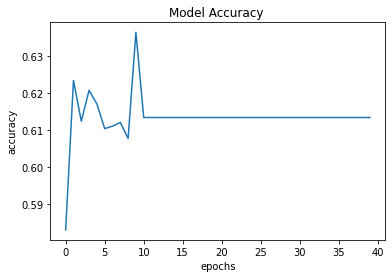

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.title('Model Accuracy ')
plt.show()